# Projet 1: Cartographie de la qualité de l'air en région Centre Val de Loire

## Introduction

## Rappel sur les valeurs limites

## Script Python

In [1]:
#Importation des bibliothèques utile au projet
import json
import requests
import pandas
import numpy as np
import matplotlib.pyplot as plt
import folium
from pandas.io.json import json_normalize
import os
import webbrowser


### Importation des données de l' API 

In [2]:
r = requests.get('https://services1.arcgis.com/HzzPcgRsxxyIZdlU/arcgis/rest/services/mes_centre_val_de_loire_mensuel_poll_princ_1/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json').json()
#print(r)

In [3]:
# Mise en forme des donnéées
result = json_normalize(r['features'])
#print(result)

In [4]:
# Création d'un dataframe à partir du json
df= pandas.DataFrame(result)
#print(df)
df.head(5)

,attributes.ESRI_OID,attributes.code_station,attributes.date_debut,attributes.date_fin,attributes.id,attributes.id_com,attributes.id_poll_ue,attributes.influence,attributes.metrique,attributes.nom_com,...,attributes.statut_valid,attributes.typologie,attributes.unite,attributes.valeur,attributes.x_l93,attributes.x_wgs84,attributes.y_l93,attributes.y_wgs84,geometry.x,geometry.y
0,1,FR34051,2019-06-01 00:00:00,2019-06-30 23:59:59,1,36044,38,Urbaine,mensuelle,Châteauroux,...,0,Fond,µg/m3,0.3,"600 329,2082205",1.69313,"6 633 950,0203331",46.798267,1.69313,46.798267
1,2,FR34051,2018-08-01 00:00:00,2018-08-31 23:59:59,2,36044,38,Urbaine,mensuelle,Châteauroux,...,1,Fond,µg/m3,0.5,"600 329,2082205",1.69313,"6 633 950,0203331",46.798267,1.69313,46.798267
2,3,FR34051,2018-06-01 00:00:00,2018-06-30 23:59:59,3,36044,38,Urbaine,mensuelle,Châteauroux,...,1,Fond,µg/m3,0.9,"600 329,2082205",1.69313,"6 633 950,0203331",46.798267,1.69313,46.798267
3,4,FR34051,2018-07-01 00:00:00,2018-07-31 23:59:59,4,36044,38,Urbaine,mensuelle,Châteauroux,...,1,Fond,µg/m3,0.9,"600 329,2082205",1.69313,"6 633 950,0203331",46.798267,1.69313,46.798267
4,5,FR34051,2019-05-01 00:00:00,2019-05-31 23:59:59,5,36044,38,Urbaine,mensuelle,Châteauroux,...,1,Fond,µg/m3,1.0,"600 329,2082205",1.69313,"6 633 950,0203331",46.798267,1.69313,46.798267


In [5]:
# Chargement du fond de carte avec la folium
# Point de départ à l'ouverture de la carte, ici ce sont les coordonnées de Tours
#Tours sera le point de Référence pour l' ouverture des cartes
carte = folium.Map(location = [47.406861,  0.693907], zoom_start = 13)



### Carte du polluant NO dans la région CVDL

In [6]:
# Création de la carte et zoom sur une localisation particulière
carte1 = folium.Map(location = [47.406861,  0.693907], zoom_start = 13)

# Filtre pour récupérer que les valeurs de NO Valide au niveau des zones de Traffics
NO_filter=df[(df["attributes.nom_polluant"] == "NO")& (df["attributes.typologie"] == "Trafic")& (df["attributes.statut_valid"] == "1")]

# Calcul de la valeur moyenne de NO du 2018/06/01 au 2019/06/01
# fonction round pour conserver seulement 3 décimals sur les résultats finals
NO_filtergp=round((NO_filter.groupby(['attributes.nom_com']).mean()).reset_index(drop=False),3)

# Création de la carte avec des données présentés sous forme de cercle, le diamètre étant proportionel à la concentration du polluant
# On garde un facteur *100 pour le radius dans toutes les cartes pour conserver une homogénéité et faciliter l'interprétation
for i in range(len(NO_filtergp)):
   folium.Circle(
      location=[NO_filtergp.iloc[i]['attributes.y_wgs84'], NO_filtergp.iloc[i]['attributes.x_wgs84']],
      radius=NO_filtergp.iloc[i]['attributes.valeur']*100,
      color='red',
      fill=True,
      fill_color='red',
      popup= ['NO Traffic',
              [NO_filtergp.iloc[i]['attributes.valeur']]]
   ).add_to(carte1)

# Filtre pour récupérer que les valeurs de NO Valide au niveau des zones de Fonds
NO_filter2=df[(df["attributes.nom_polluant"] == "NO")& (df["attributes.typologie"] == "Fond")& (df["attributes.statut_valid"] == "1")]

# Calcul de la valeur moyenne de NO du 2018/05/01 au 2019/06/01
NO_filtergp2=round((NO_filter2.groupby(['attributes.nom_com']).mean()).reset_index(drop=False),3)


for i in range(len(NO_filtergp2)):
   folium.Circle(
      location=[NO_filtergp2.iloc[i]['attributes.y_wgs84'], NO_filtergp2.iloc[i]['attributes.x_wgs84']],
      radius=NO_filtergp2.iloc[i]['attributes.valeur']*100,
      color='green',
      fill=True,
      fill_color='green',
      popup= ["NO Fond",
             [NO_filtergp2.iloc[i]['attributes.valeur']]]
   ).add_to(carte1)
display(carte1)

### Carte du polluant NO2 dans la région CVDL

In [7]:

carte2 = folium.Map(location = [47.406861,  0.693907], zoom_start = 13)


NO2_filter=df[(df["attributes.nom_polluant"] == "NO2")& (df["attributes.typologie"] == "Trafic")& (df["attributes.statut_valid"] == "1")]
NO2_filtergp=round((NO2_filter.groupby(['attributes.nom_com']).mean()).reset_index(drop=False),3)


for i in range(len(NO2_filtergp)):
   folium.Circle(
      location=[NO2_filtergp.iloc[i]['attributes.y_wgs84'], NO2_filtergp.iloc[i]['attributes.x_wgs84']],
      radius=NO2_filtergp.iloc[i]['attributes.valeur']*100,
      color='red',
      fill=True,
      fill_color='red',
      popup= ['NO2 Traffic',
              ['NO2',NO2_filtergp.iloc[i]['attributes.valeur']]]
   ).add_to(carte2)

NO2_filter2=df[(df["attributes.nom_polluant"] == "NO2")& (df["attributes.typologie"] == "Fond")& (df["attributes.statut_valid"] == "1")]
NO2_filtergp2=round((NO2_filter2.groupby(['attributes.nom_com']).mean()).reset_index(drop=False),3)

df5=pandas.DataFrame(NO2_filtergp2)
#print(df5)


for i in range(len(NO2_filtergp2)):
  folium.Circle(
      location=[NO2_filtergp2.iloc[i]['attributes.y_wgs84'], NO2_filtergp2.iloc[i]['attributes.x_wgs84']],
      radius=NO2_filtergp2.iloc[i]['attributes.valeur']*100,
      color='green',
      fill=True,
      fill_color='green',
      popup= ['NO2 Fond',
              ['N02',NO2_filtergp2.iloc[i]['attributes.valeur']]]
      ).add_to(carte2)

display(carte2)

### Carte du polluant PM10 dans la région CVDL

In [8]:

carte3 = folium.Map(location = [47.406861,  0.693907], zoom_start = 13)


PM10_filter=df[(df["attributes.nom_polluant"] == "PM10")& (df["attributes.typologie"] == "Trafic")& (df["attributes.statut_valid"] == "1")]
PM10_filtergp=round((PM10_filter.groupby(['attributes.nom_com']).mean()).reset_index(drop=False),3)


for i in range(len(PM10_filtergp)):
   folium.Circle(
      location=[PM10_filtergp.iloc[i]['attributes.y_wgs84'], PM10_filtergp.iloc[i]['attributes.x_wgs84']],
      radius=PM10_filtergp.iloc[i]['attributes.valeur']*100,
      color='red',
      fill=True,
      fill_color='red',
      popup= ['PM10 Traffic',
              [PM10_filtergp.iloc[i]['attributes.valeur']]]
   ).add_to(carte3)

PM10_filter2=df[(df["attributes.nom_polluant"] == "PM10")& (df["attributes.typologie"] == "Fond")& (df["attributes.statut_valid"] == "1")]
PM10_filtergp2=round((PM10_filter2.groupby(['attributes.nom_com']).mean()).reset_index(drop=False),3)


for i in range(len(PM10_filtergp2)):
   folium.Circle(
      location=[PM10_filtergp2.iloc[i]['attributes.y_wgs84'], PM10_filtergp2.iloc[i]['attributes.x_wgs84']],
      radius=PM10_filtergp2.iloc[i]['attributes.valeur']*100,
      color='green',
      fill=True,
      fill_color='green',
      popup= ["PM10 Fond",
             [PM10_filtergp2.iloc[i]['attributes.valeur']]]
   ).add_to(carte3)





display(carte3)

### Carte du polluant PM2.5 dans la région CVDL 

In [9]:

carte4 = folium.Map(location = [47.406861,  0.693907], zoom_start = 13)


PM25_filter=df[(df["attributes.nom_polluant"] == "PM2.5")& (df["attributes.typologie"] == "Trafic")& (df["attributes.statut_valid"] == "1")]
PM25_filtergp=round((PM25_filter.groupby(['attributes.nom_com']).mean()).reset_index(drop=False),3)

for i in range(len(PM25_filtergp)):
   folium.Circle(
      location=[PM25_filtergp.iloc[i]['attributes.y_wgs84'], PM25_filtergp.iloc[i]['attributes.x_wgs84']],
      radius=PM25_filtergp.iloc[i]['attributes.valeur']*100,
      color='red',
      fill=True,
      fill_color='red',
      popup= [PM25_filtergp.iloc[i]['attributes.valeur']]
   ).add_to(carte4)

PM25_filter2=df[(df["attributes.nom_polluant"] == "PM2.5")& (df["attributes.typologie"] == "Fond")& (df["attributes.statut_valid"] == "1")]
PM25_filtergp2=round((PM25_filter2.groupby(['attributes.nom_com']).mean()).reset_index(drop=False),3)


for i in range(len(PM25_filtergp2)):
   folium.Circle(
      location=[PM25_filtergp2.iloc[i]['attributes.y_wgs84'], PM25_filtergp2.iloc[i]['attributes.x_wgs84']],
      radius=PM25_filtergp2.iloc[i]['attributes.valeur']*100,
      color='green',
      fill=True,
      fill_color='green',
      popup= ["PM2.5 Fond",
             [PM25_filtergp2.iloc[i]['attributes.valeur']]]
   ).add_to(carte4)





display(carte4)

### Carte du polluant O3 dans la région CVDL 

In [10]:

carte5 = folium.Map(location = [47.406861,  0.693907], zoom_start = 13)


O3_filter=df[(df["attributes.nom_polluant"] == "O3")& (df["attributes.typologie"] == "Trafic")& (df["attributes.statut_valid"] == "1")]
O3_filtergp=round((O3_filter.groupby(['attributes.nom_com']).mean()).reset_index(drop=False),3)


for i in range(len(O3_filtergp)):
   folium.Circle(
      location=[O3_filtergp.iloc[i]['attributes.y_wgs84'], O3_filtergp.iloc[i]['attributes.x_wgs84']],
      radius=O3_filtergp.iloc[i]['attributes.valeur']*100,
      color='red',
      fill=True,
      fill_color='red',
      popup= ['O3 Traffic'
              [O3_filtergp.iloc[i]['attributes.valeur']]]
   ).add_to(carte5)
# Il n y a pas de mesure de O3 en zone traffic sur la période concernée

O3_filter2=df[(df["attributes.nom_polluant"] == "O3")& (df["attributes.typologie"] == "Fond")& (df["attributes.statut_valid"] == "1")]
O3_filtergp2=round((O3_filter2.groupby(['attributes.nom_com']).mean()).reset_index(drop=False),3)


for i in range(len(O3_filtergp2)):
   folium.Circle(
      location=[O3_filtergp2.iloc[i]['attributes.y_wgs84'], O3_filtergp2.iloc[i]['attributes.x_wgs84']],
      radius=O3_filtergp2.iloc[i]['attributes.valeur']*100,
      color='green',
      fill=True,
      fill_color='green',
      popup= ["O3 Fond",
             [O3_filtergp2.iloc[i]['attributes.valeur']]]
   ).add_to(carte5)





display(carte5)

### Carte du polluant CO dans la région CVDL

In [11]:
carte6 = folium.Map(location = [47.406861,  0.693907], zoom_start = 10)


CO_filter=df[(df["attributes.nom_polluant"] == "CO")& (df["attributes.typologie"] == "Trafic")& (df["attributes.statut_valid"] == "1")]
CO_filtergp=round((CO_filter.groupby(['attributes.nom_com']).mean()).reset_index(drop=False),3)


for i in range(len(CO_filtergp)):
   folium.Marker(
      location=[CO_filtergp.iloc[i]['attributes.y_wgs84'], CO_filtergp.iloc[i]['attributes.x_wgs84']],
      radius=CO_filtergp.iloc[i]['attributes.valeur']*100,
      icon=folium.Icon(color='red', icon='info-sign'), 
      popup= ["CO Traffic",[CO_filtergp.iloc[i]['attributes.valeur']]]
   ).add_to(carte6)

CO_filter2=df[(df["attributes.nom_polluant"] == "CO")& (df["attributes.typologie"] == "Fond")& (df["attributes.statut_valid"] == "1")]
CO_filtergp2=round((CO_filter2.groupby(['attributes.nom_com']).mean()).reset_index(drop=False),3)


for i in range(len(CO_filtergp2)):
   folium.Marker(
      location=[CO_filtergp2.iloc[i]['attributes.y_wgs84'], CO_filtergp2.iloc[i]['attributes.x_wgs84']],
      #radius=CO_filtergp2.iloc[i]['attributes.valeur']*1000,
      icon=folium.Icon(color='red', icon='info-sign'),  
      popup= ["CO Fond",
             [CO_filtergp2.iloc[i]['attributes.valeur']]]
   ).add_to(carte6)

#Il n'y a qu'une seul mesure de CO dans la région CVDL, on choisis dans un Marker ici plutot qu'un Circle, par commodité, car il est ains plus facile de repérer le point.



display(carte6)

## Représentations graphiques 

### Boxplot pour NO

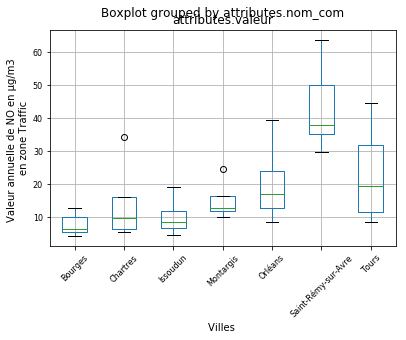

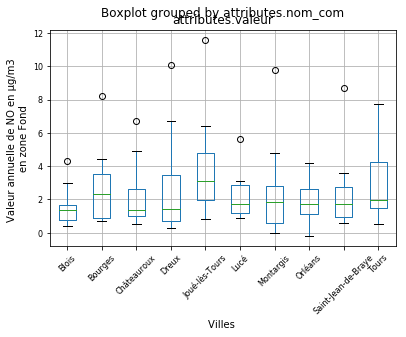

In [12]:
Graph=NO_filter.boxplot(column=['attributes.valeur'], by=['attributes.nom_com'])
plt.xticks(rotation = 45)
plt.xlabel('Villes ')
plt.ylabel('Valeur annuelle de NO en µg/m3 \nen zone Traffic')
plt.tick_params(axis = 'both', labelsize = 8)
#plt.title('Polluant')
plt.show()

Graph=NO_filter2.boxplot(column=['attributes.valeur'], by=['attributes.nom_com'])
plt.xticks(rotation = 45)
plt.xlabel('Villes ')
plt.ylabel('Valeur annuelle de NO en µg/m3 \nen zone Fond')
plt.tick_params(axis = 'both', labelsize = 8)
#plt.title('Polluant')
plt.show()


### Boxplot pour NO2

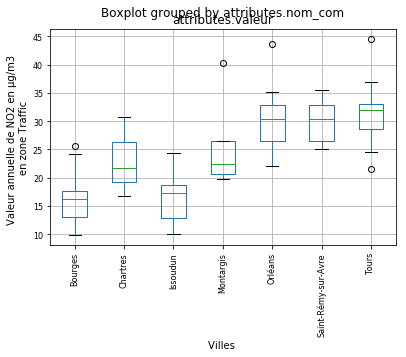

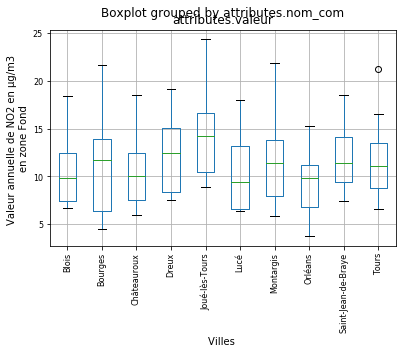

In [13]:
Graph=NO2_filter.boxplot(column=['attributes.valeur'], by=['attributes.nom_com'])
#plt.xticks(fontsize=8)
plt.xticks(rotation = 'vertical')
plt.xlabel('Villes ')
plt.ylabel('Valeur annuelle de NO2 en µg/m3 \nen zone Traffic')
#plt.xticks(fontsize=8)
plt.tick_params(axis = 'both', labelsize = 8)
#plt.title('Polluant')
plt.show()

Graph=NO2_filter2.boxplot(column=['attributes.valeur'], by=['attributes.nom_com'])

plt.xticks(rotation = 'vertical')
plt.xlabel('Villes ')
plt.ylabel('Valeur annuelle de NO2 en µg/m3 \nen zone Fond')

plt.tick_params(axis = 'both', labelsize = 8)
#plt.title('Polluant')
plt.show()


### Boxplot pour CO 

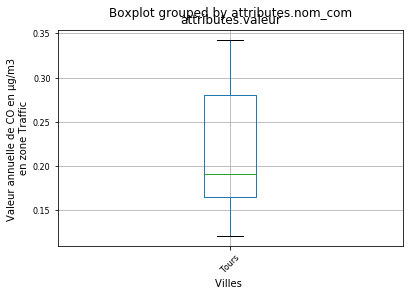

In [14]:
Graph=CO_filter.boxplot(column=['attributes.valeur'], by=['attributes.nom_com'])
#plt.xticks(fontsize=8)
plt.xticks(rotation = 45)
plt.xlabel('Villes ')
plt.ylabel('Valeur annuelle de CO en µg/m3 \nen zone Traffic')
#plt.xticks(fontsize=8)
plt.tick_params(axis = 'both', labelsize = 8)
#plt.title('Polluant')
plt.show()



### Boxplot pour O3

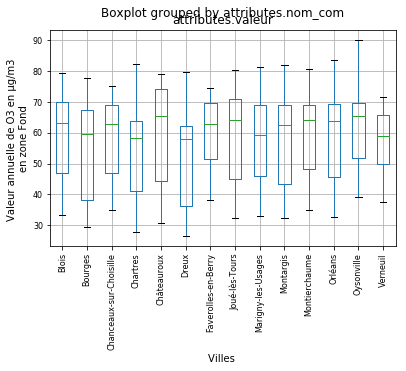

In [15]:
Graph=O3_filter2.boxplot(column=['attributes.valeur'], by=['attributes.nom_com'])

plt.xticks(rotation = 'vertical')
plt.xlabel('Villes ')
plt.ylabel('Valeur annuelle de O3 en µg/m3 \nen zone Fond')

plt.tick_params(axis = 'both', labelsize = 8)
#plt.title('Polluant')
plt.show()


### Boxplot pour PM2.5

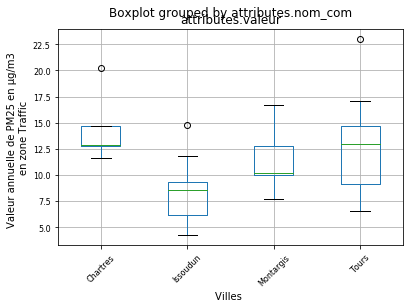

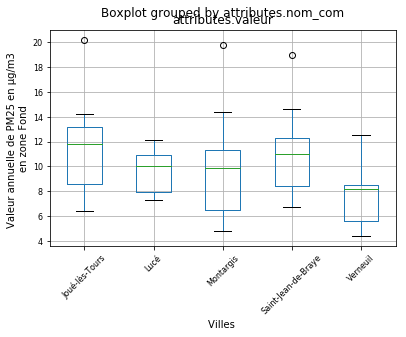

In [16]:
Graph=PM25_filter.boxplot(column=['attributes.valeur'], by=['attributes.nom_com'])

plt.xticks(rotation = 45)
plt.xlabel('Villes ')
plt.ylabel('Valeur annuelle de PM25 en µg/m3 \nen zone Traffic')

plt.tick_params(axis = 'both', labelsize = 8)
#plt.title('Polluant')
plt.show()

Graph=PM25_filter2.boxplot(column=['attributes.valeur'], by=['attributes.nom_com'])

plt.xticks(rotation = 45)
plt.xlabel('Villes ')
plt.ylabel('Valeur annuelle de PM25 en µg/m3 \nen zone Fond')

plt.tick_params(axis = 'both', labelsize = 8)
#plt.title('Polluant')
plt.show()


### Boxplot pour PM10 

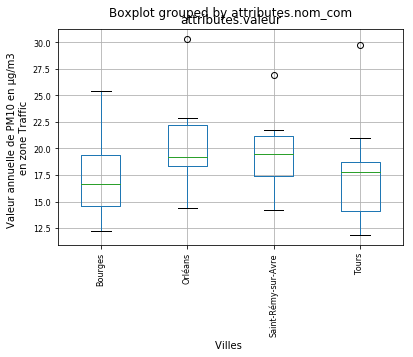

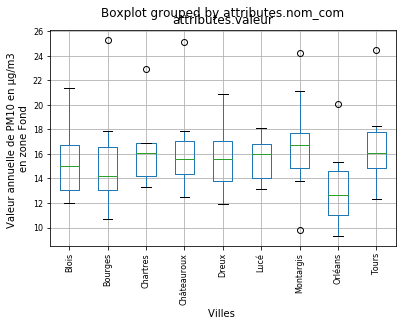

In [17]:
Graph=PM10_filter.boxplot(column=['attributes.valeur'], by=['attributes.nom_com'])

plt.xticks(rotation = 'vertical')
plt.xlabel('Villes ')
plt.ylabel('Valeur annuelle de PM10 en µg/m3 \nen zone Traffic')

plt.tick_params(axis = 'both', labelsize = 8)
#plt.title('Polluant')
plt.show()

Graph=PM10_filter2.boxplot(column=['attributes.valeur'], by=['attributes.nom_com'])

plt.xticks(rotation = 'vertical')
plt.xlabel('Villes ')
plt.ylabel('Valeur annuelle de PM10 en µg/m3 \nen zone Fond')

plt.tick_params(axis = 'both', labelsize = 8)
#plt.title('Polluant')
plt.show()
#plt.legend()
#plt.show()

# Conclusion